Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 101s 114ms/step - accuracy: 0.7091 - loss: 0.8703 - val_accuracy: 0.9538 - val_loss: 0.1499
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 138s 109ms/step - accuracy: 0.9549 - loss: 0.1526 - val_accuracy: 0.9807 - val_loss: 0.0739
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 96ms/step - accuracy: 0.9704 - loss: 0.0983 - val_accuracy: 0.9808 - val_loss: 0.0703
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 78s 92ms/step - accuracy: 0.9782 - loss: 0.0743 - val_accuracy: 0.9843 - val_loss: 0.0545
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 95ms/step - accuracy: 0.9817 - loss: 0.0603 - val_accuracy: 0.9840 - val_loss: 0.0586
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 95ms/step - accuracy: 0.9841 - loss: 0.0509 - val_accuracy: 0.9855 - val_loss: 0.0471
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 92ms/step - accuracy: 0.9866 - loss: 0.0433 - val_accuracy: 0.9845 - val_loss: 0.0502
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 78s 92ms/step - accuracy: 0.9878 - loss: 0.039

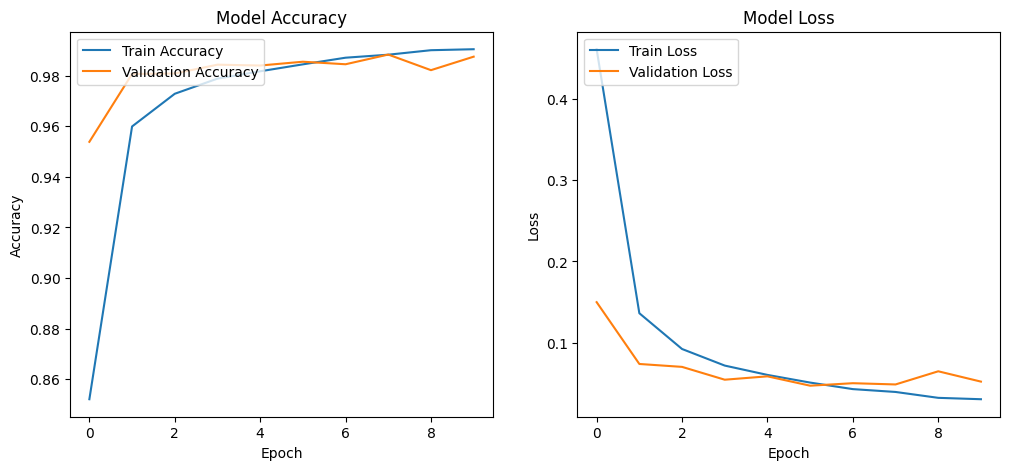

In [2]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Step 1: Download and load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 2: Preprocessing the dataset
# Normalize the images to a range of [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the input to be [samples, time steps, features]
# Here we treat the 28x28 images as sequences of 28 timesteps, each with 28 features
x_train = x_train.reshape((x_train.shape[0], 28, 28))
x_test = x_test.reshape((x_test.shape[0], 28, 28))

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Step 3: Build the RNN model
model = Sequential()
model.add(LSTM(128, input_shape=(28, 28), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# Step 4: Compile and fit the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

# Step 5: Perform prediction with the test dataset
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Step 6: Calculate performance metrics
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report
print(classification_report(y_test_classes, y_pred_classes))

# Plotting the training & validation accuracy and loss values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()